### Para este script, vamos usar o mlbench (Machine Learning Benchmark Problems). Este pacote contém diversos datasets e usaremos um com os dados de votação do congresso americano 

## Vamos prever os votos republicanos e democratas (variável Class)

In [1]:
# Importação
library(mlbench)

Warning message:
"package 'mlbench' was built under R version 4.2.3"


In [2]:
#Carregando Dataset
data("HouseVotes84")
dados <-HouseVotes84

In [3]:
head(dados,10)
dim(dados)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NA,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NA,y
9,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y


[1] 435  17

### Sobre as variáveis:
Cada linha no conjunto de dados representa o registro de um membro do congresso e suas posições em relação a votações específicas. Por exemplo, na primeira linha, o membro é um republicano que votou "não" na primeira questão, "sim" na segunda, "não" na terceira, e assim por diante.

- Classe: Nome: 2 (democrata, republicano)
- Bebês com Deficiência: 2 (sim, não)
- Compartilhamento de Custos do Projeto de Água: 2 (sim, não)
- Adoção da Resolução Orçamentária: 2 (sim, não)
- Congelamento de Taxas Médicas: 2 (sim, não)
- Ajuda a El Salvador: 2 (sim, não)
- Grupos Religiosos nas Escolas: 2 (sim, não)
- Proibição de Testes Anti-Satélite: 2 (sim, não)
- Ajuda aos Contras Nicaraguenses: 2 (sim, não)
- Míssil MX: 2 (sim, não)
- Imigração: 2 (sim, não)
- Redução na Corporação de Combustíveis Sintéticos: 2 (sim, não)
- Gastos com Educação: 2 (sim, não)
- Direito de Processar o Superfundo: 2 (sim, não)
- Crime: 2 (sim, não)
- Exportações Livres de Impostos: 2 (sim, não)
- Lei de Administração de Exportações para a África do Sul: 2 (sim, não)"

In [4]:
data.frame(colSums(is.na(dados)))

,colSums.is.na.dados..
,<dbl>
Class,0
V1,12
V2,48
V3,11
V4,11
V5,15
V6,11
V7,14
V8,15


In [5]:
str(dados)

'data.frame':	435 obs. of  17 variables:
 $ Class: Factor w/ 2 levels "democrat","republican": 2 2 1 1 1 1 1 2 2 1 ...
 $ V1   : Factor w/ 2 levels "n","y": 1 1 NA 1 2 1 1 1 1 2 ...
 $ V2   : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3   : Factor w/ 2 levels "n","y": 1 1 2 2 2 2 1 1 1 2 ...
 $ V4   : Factor w/ 2 levels "n","y": 2 2 NA 1 1 1 2 2 2 1 ...
 $ V5   : Factor w/ 2 levels "n","y": 2 2 2 NA 2 2 2 2 2 1 ...
 $ V6   : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 2 2 2 1 ...
 $ V7   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V8   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V9   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 2 ...
 $ V10  : Factor w/ 2 levels "n","y": 2 1 1 1 1 1 1 1 1 1 ...
 $ V11  : Factor w/ 2 levels "n","y": NA 1 2 2 2 1 1 1 1 1 ...
 $ V12  : Factor w/ 2 levels "n","y": 2 2 1 1 NA 1 1 1 2 1 ...
 $ V13  : Factor w/ 2 levels "n","y": 2 2 2 2 2 2 NA 2 2 1 ...
 $ V14  : Factor w/ 2 levels "n","y": 2 2 2 1 2 2 2 2 2 1 ...
 $ V15 

In [6]:
#Fazendo uma copia para realizar alterações
dados1 <- dados
head(dados1)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [7]:
#Convertendo as colunas para facilitar calculos
dados1[, 1:17] <- lapply(dados1[, 1:17], as.character)

In [8]:
#Substituindo NA por 'NA caracter' 
dados1 <- replace(dados1, is.na(dados1), 'NA')

In [9]:
#Somando valores ausentes
sum(is.na(dados1))

[1] 0

In [10]:
head(dados1)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [11]:
total_republicanos <- sum(dados1$Class == 'republican')
total_republicanos 

[1] 168

In [12]:
total_democratas <- sum(dados1$Class == 'democrat')
total_democratas

[1] 267

### Dado que os democratas constituem a maioria, criei  uma função para analisar as votações proporcionais dentro de cada partido com base no número total de votos.

In [13]:
porcentagem_democratas <- function(x) {
  sim <- sum(dados1$Class == 'democrat' & x == 'y')
  porcentagem_sim_d <- (sim / total_democratas) * 100
  
  nao <- sum(dados1$Class == 'democrat' & x == 'n')
  porcentagem_nao_d <- (nao / total_democratas) * 100
  
  Na <- sum(dados1$Class == 'democrat' & x == 'NA')
  porcentagem_NA_d <- (Na / total_democratas) * 100
    
     # Armazenar em variáveis globais
  assign('porcentagem_sim_Dem', porcentagem_sim_d, envir = .GlobalEnv)
  assign('porcentagem_nao_Dem', porcentagem_nao_d, envir = .GlobalEnv)
  assign('porcentagem_NA_Dem', porcentagem_NA_d, envir = .GlobalEnv)
  
  return(list(porcentagem_sim_Dem = porcentagem_sim_d, porcentagem_nao_Dem = porcentagem_nao_d, 
              porcentagem_NA_Dem = porcentagem_NA_d))
}

In [14]:
porcentagem_democratas(dados1$V1)

$porcentagem_sim_Dem
[1] 58.42697

$porcentagem_nao_Dem
[1] 38.20225

$porcentagem_NA_Dem
[1] 3.370787

In [15]:
porcentagem_republicanos <- function(x) {
  sim <- sum(dados1$Class == 'republican' & x == 'y')
  porcentagem_sim_r <- (sim / total_republicanos) * 100
  
  nao <- sum(dados1$Class == 'republican' & x == 'n')
  porcentagem_nao_r <- (nao / total_republicanos) * 100
  
  Na <- sum(dados1$Class == 'republican' & x == 'NA')
  porcentagem_NA_r <- (Na / total_republicanos) * 100
    
     # Armazenar em variáveis globais
  assign('porcentagem_sim_Rep', porcentagem_sim_r, envir = .GlobalEnv)
  assign('porcentagem_nao_Rep', porcentagem_nao_r, envir = .GlobalEnv)
  assign('porcentagem_NA_Rep', porcentagem_NA_r, envir = .GlobalEnv)
  
  return(list(porcentagem_sim_Rep = porcentagem_sim_r, porcentagem_nao_Rep = porcentagem_nao_r, 
              porcentagem_NA_Rep = porcentagem_NA_r))
}

In [16]:
porcentagem_republicanos(dados1$V1)

$porcentagem_sim_Rep
[1] 18.45238

$porcentagem_nao_Rep
[1] 79.7619

$porcentagem_NA_Rep
[1] 1.785714

### Agora podemos fazer os calculos para cada coluna

In [17]:
# Carregue a biblioteca ggplot2
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [18]:
# Crie um dataframe com os dados
dados_voto <- data.frame(
  Categoria = c('Sim', 'Não', 'Não Disponível'),
  Porcentagem_Democratas = c(porcentagem_sim_Dem, porcentagem_nao_Dem, porcentagem_NA_Dem),
    Porcentagem_Republicanos = c(porcentagem_sim_Rep, porcentagem_nao_Rep, porcentagem_NA_Rep)
)
dados_voto

Categoria,Porcentagem_Democratas,Porcentagem_Republicanos
<chr>,<dbl>,<dbl>
Sim,58.426966,18.452381
Não,38.202247,79.761905
Não Disponível,3.370787,1.785714


In [19]:
# 'Melt' os dados para torná-los mais adequados para ggplot2
library(reshape2)
# O conjunto de dados está sendo transformado de um formato mais largo para um formato mais longo
dados_voto_melted <- melt(dados_voto, id.vars = 'Categoria')
dados_voto_melted

Warning message:
"package 'reshape2' was built under R version 4.2.3"


Categoria,variable,value
<chr>,<fct>,<dbl>
Sim,Porcentagem_Democratas,58.426966
Não,Porcentagem_Democratas,38.202247
Não Disponível,Porcentagem_Democratas,3.370787
Sim,Porcentagem_Republicanos,18.452381
Não,Porcentagem_Republicanos,79.761905
Não Disponível,Porcentagem_Republicanos,1.785714


In [20]:
colnames(dados_voto_melted)[2] <- 'Partido'

In [21]:
dados_voto_melted

Categoria,Partido,value
<chr>,<fct>,<dbl>
Sim,Porcentagem_Democratas,58.426966
Não,Porcentagem_Democratas,38.202247
Não Disponível,Porcentagem_Democratas,3.370787
Sim,Porcentagem_Republicanos,18.452381
Não,Porcentagem_Republicanos,79.761905
Não Disponível,Porcentagem_Republicanos,1.785714


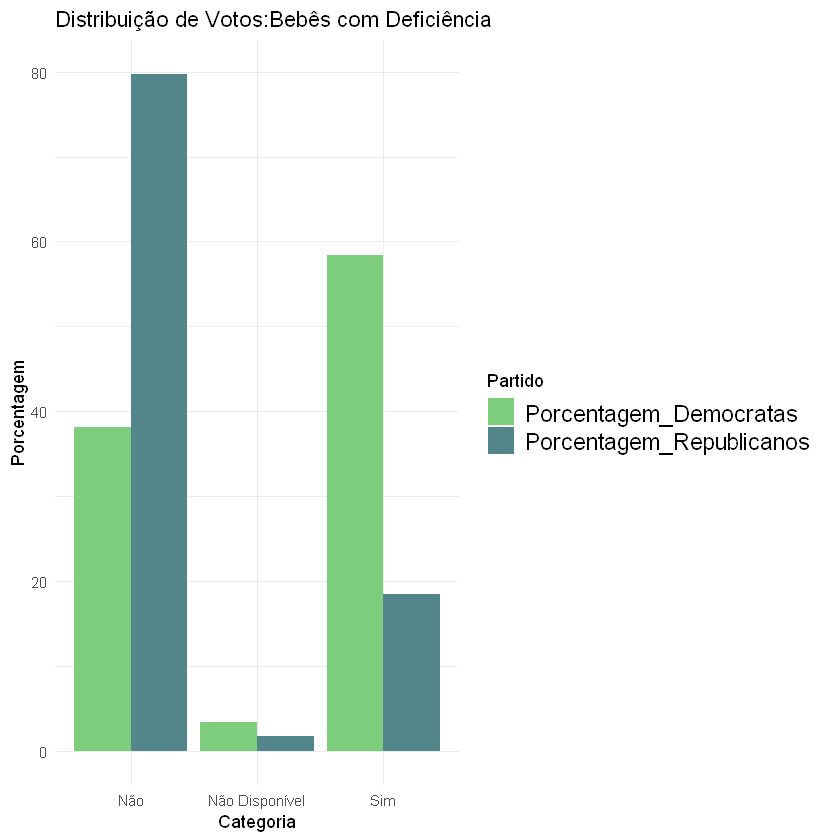

In [22]:
# Criar o histograma
ggplot(dados_voto_melted, aes(x = Categoria, y = value, fill = Partido)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  ggtitle('Distribuição de Votos:Bebês com Deficiência') +
  xlab('Categoria') +
  ylab('Porcentagem') +
  theme_minimal() +
  scale_fill_manual(values = c('Porcentagem_Democratas' = 'palegreen3', 'Porcentagem_Republicanos' = 'cadetblue4')) +
  theme(legend.text = element_text(size = 14, color = 'black'))

**A opção stat = identity** significa que as alturas das barras são representadas diretamente pelos valores no conjunto de dados.   
**A opção position = dodge** organiza as barras lado a lado para cada categoria.

### Histogramas com os dados brutos

In [23]:
#Convertendo de volta para fator
dados1[, 2:17] <- lapply(dados1[, 2:17], as.factor)
head(dados1)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [24]:
#Lista com as votações específicas
lista <- list(
"Bebês com Deficiência",
  "Compartilhamento de Custos do Projeto de Água",
  "Adoção da Resolução Orçamentária",
  "Congelamento de Taxas Médicas",
  "Ajuda a El Salvador",
  "Grupos Religiosos nas Escolas",
  "Proibição de Testes Anti-Satélite",
  "Ajuda aos Contras Nicaraguenses",
  "Míssil MX",
  "Imigração",
  "Redução na Corporação de Combustíveis Sintéticos",
  "Gastos com Educação",
  "Direito de Processar o Superfundo",
  "Crime",
  "Exportações Livres de Impostos",
  "Lei de Administração de Exportações para a África do Sul"
)

In [25]:
#Alterando o nome das colunas
colnames(dados1)[2:17] <- lista
head(dados1)

,Class,Bebês com Deficiência,Compartilhamento de Custos do Projeto de Água,Adoção da Resolução Orçamentária,Congelamento de Taxas Médicas,Ajuda a El Salvador,Grupos Religiosos nas Escolas,Proibição de Testes Anti-Satélite,Ajuda aos Contras Nicaraguenses,Míssil MX,Imigração,Redução na Corporação de Combustíveis Sintéticos,Gastos com Educação,Direito de Processar o Superfundo,Crime,Exportações Livres de Impostos,Lei de Administração de Exportações para a África do Sul
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,republican,n,y,n,y,y,y,n,n,n,y,NA,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NA
3,democrat,NA,y,y,NA,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NA,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NA,y,y,y,y
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [26]:
library(ggplot2)

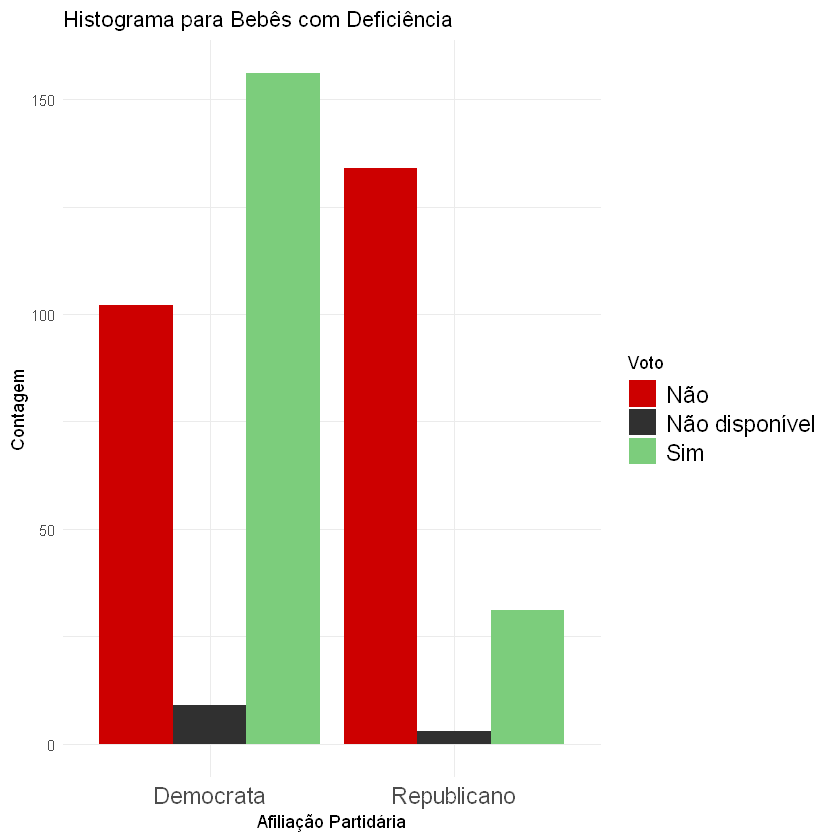

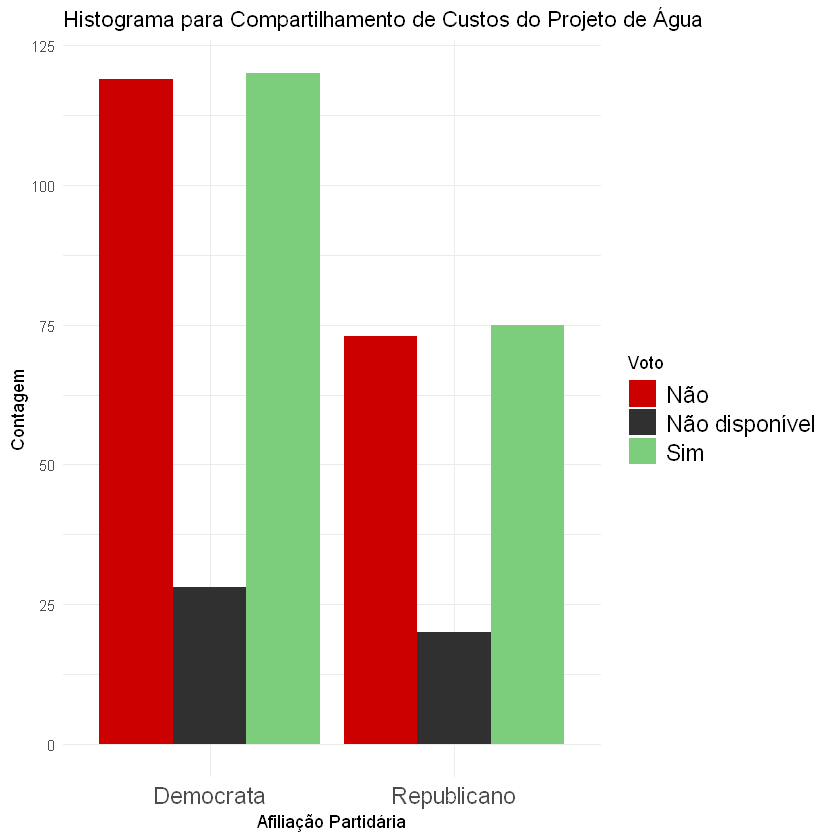

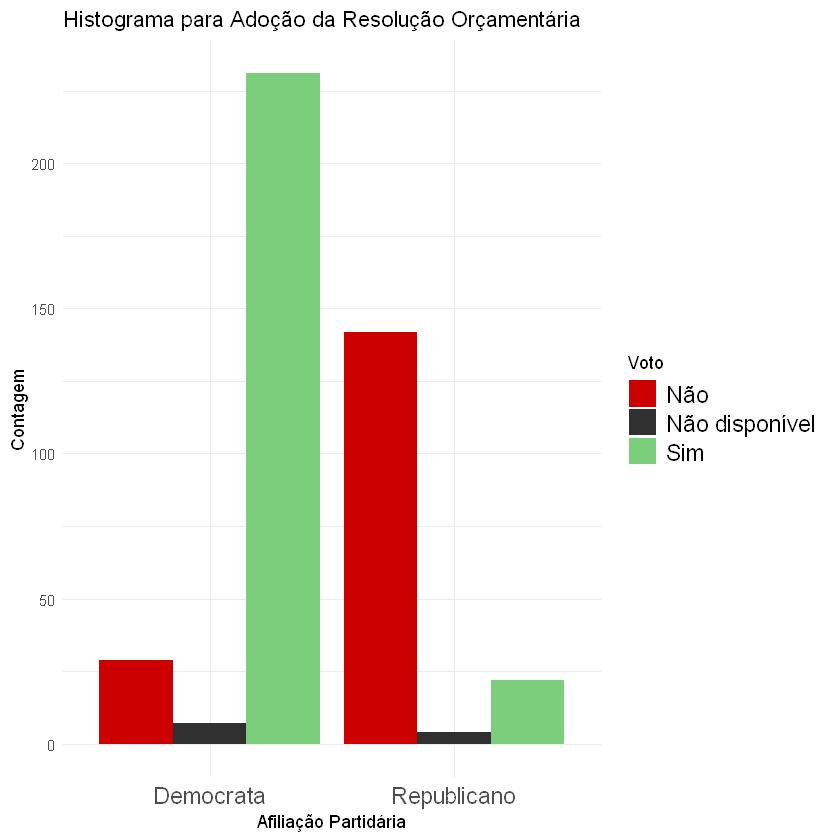

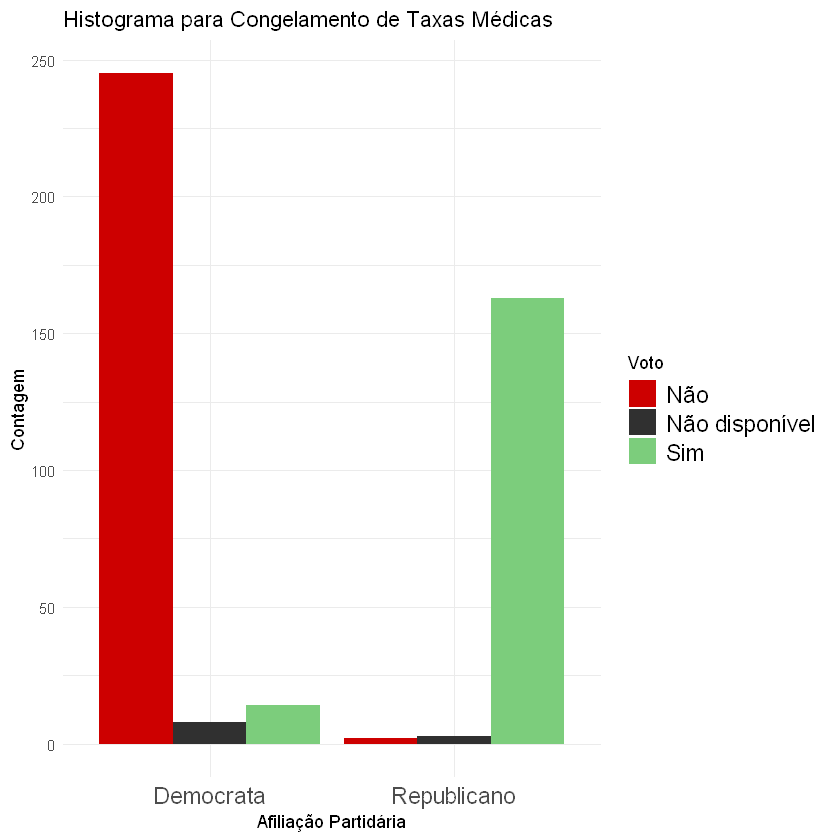

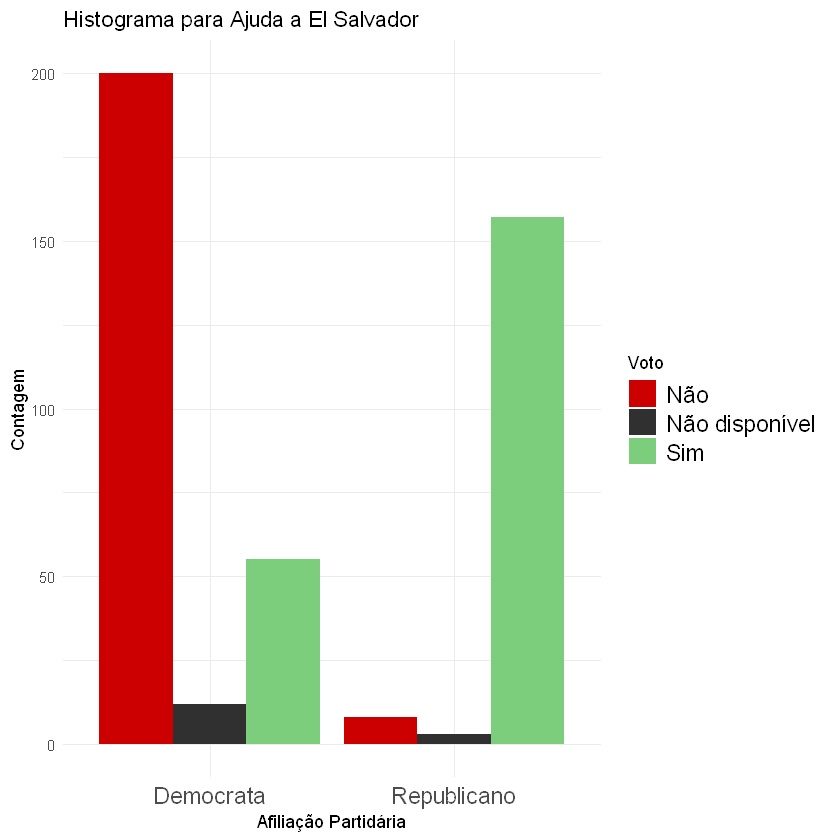

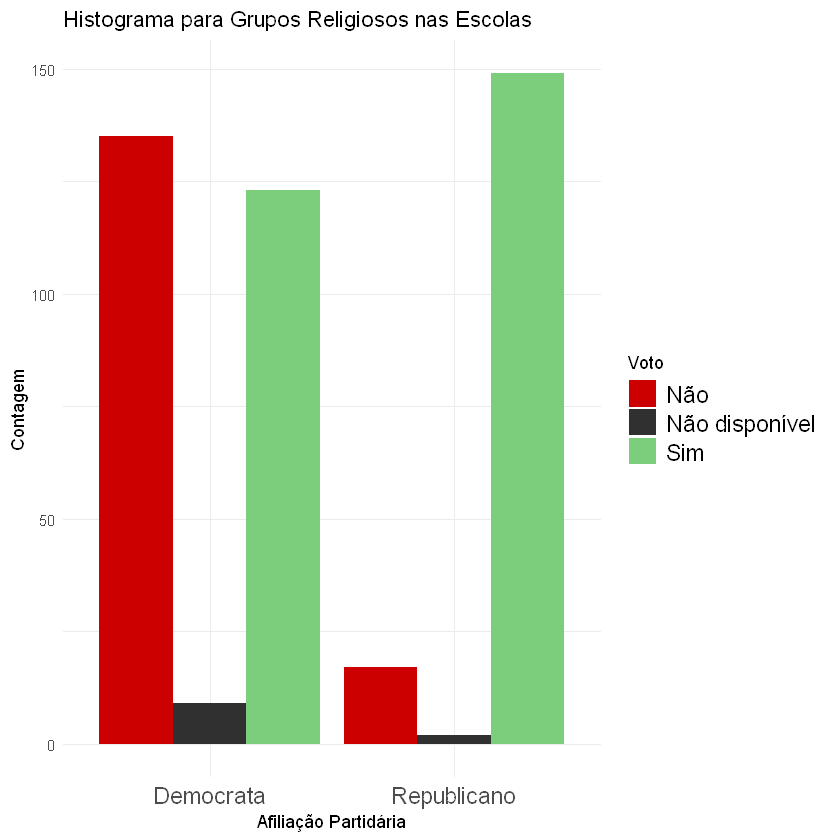

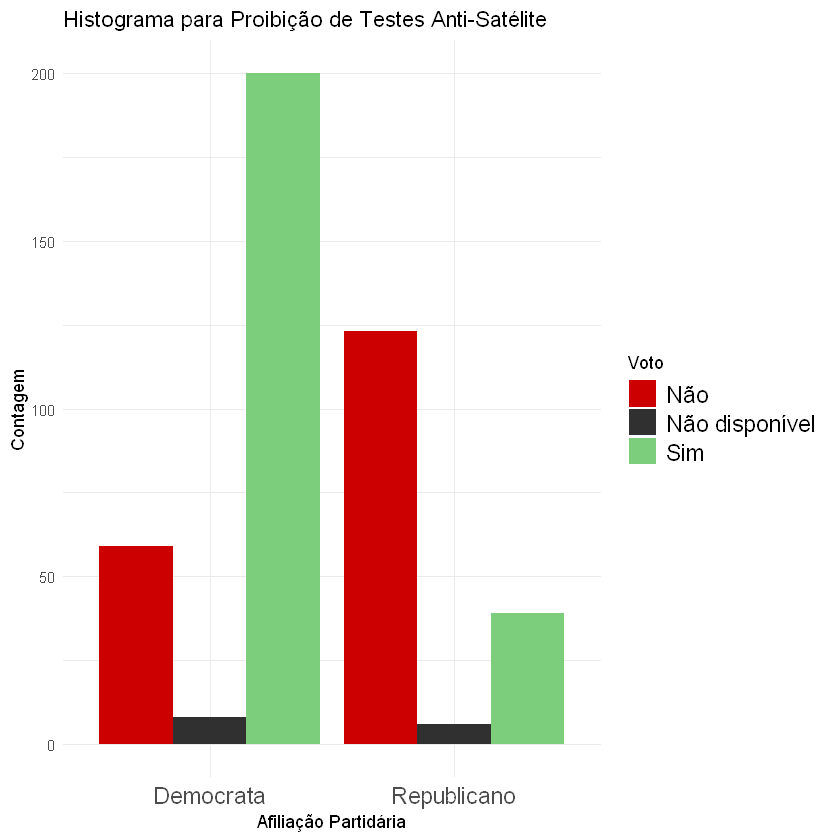

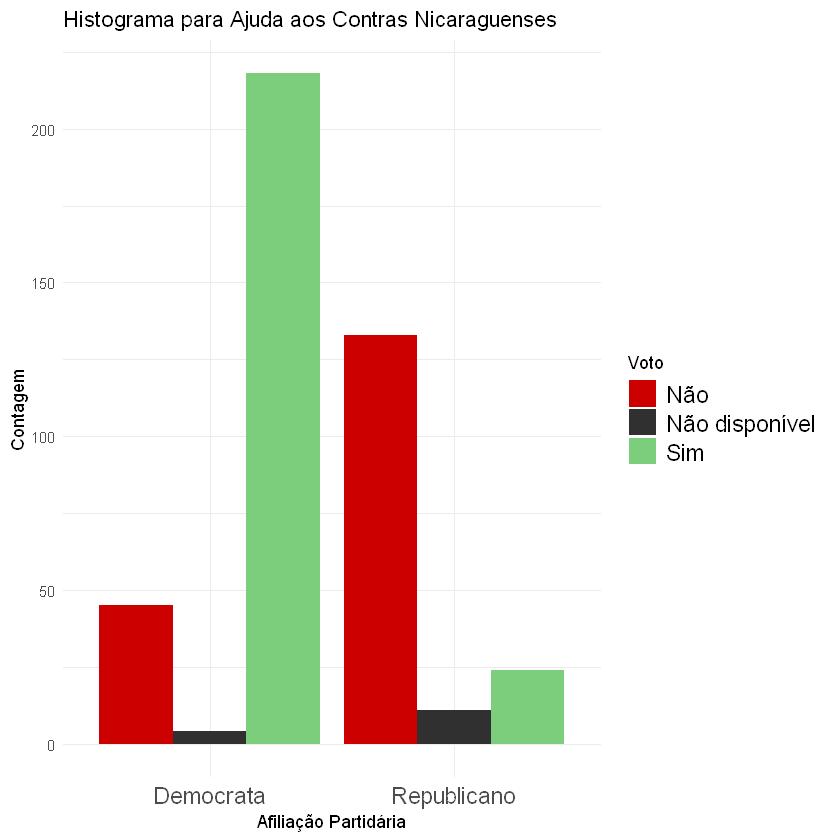

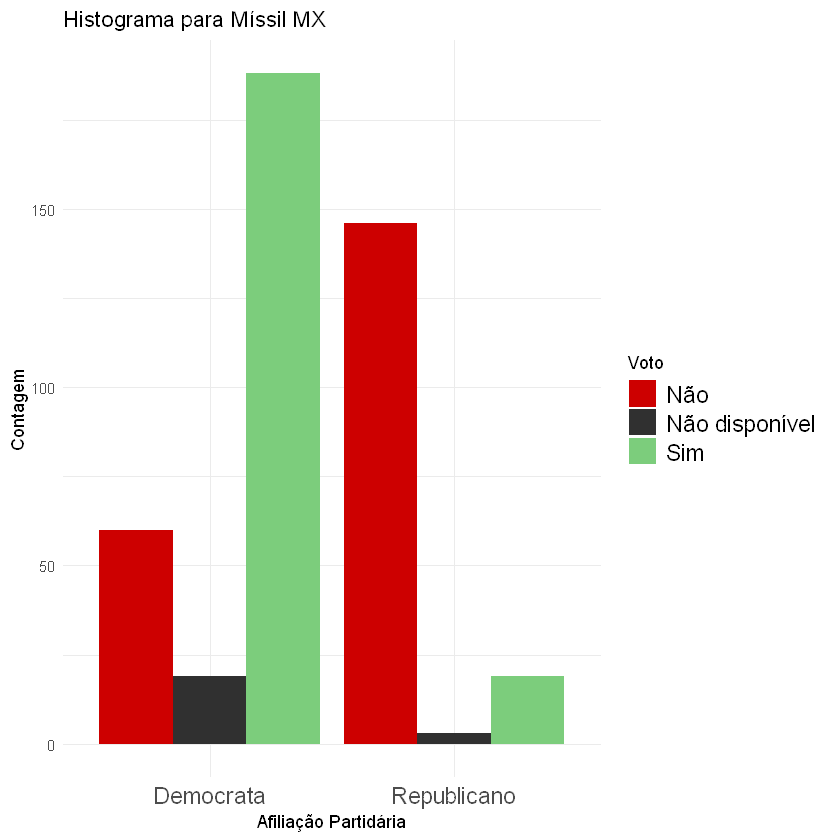

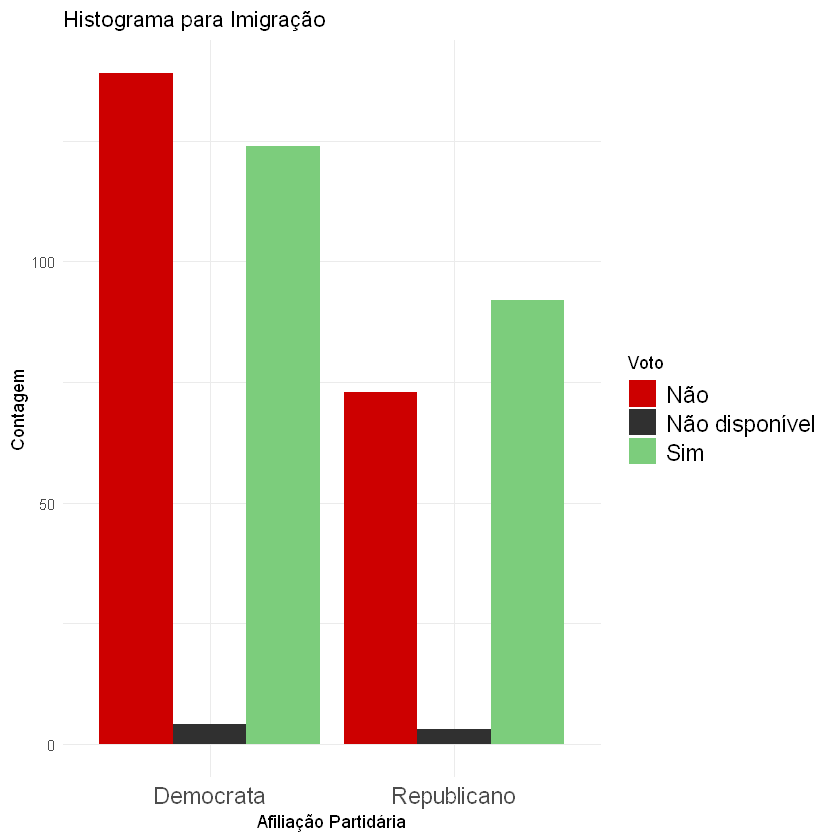

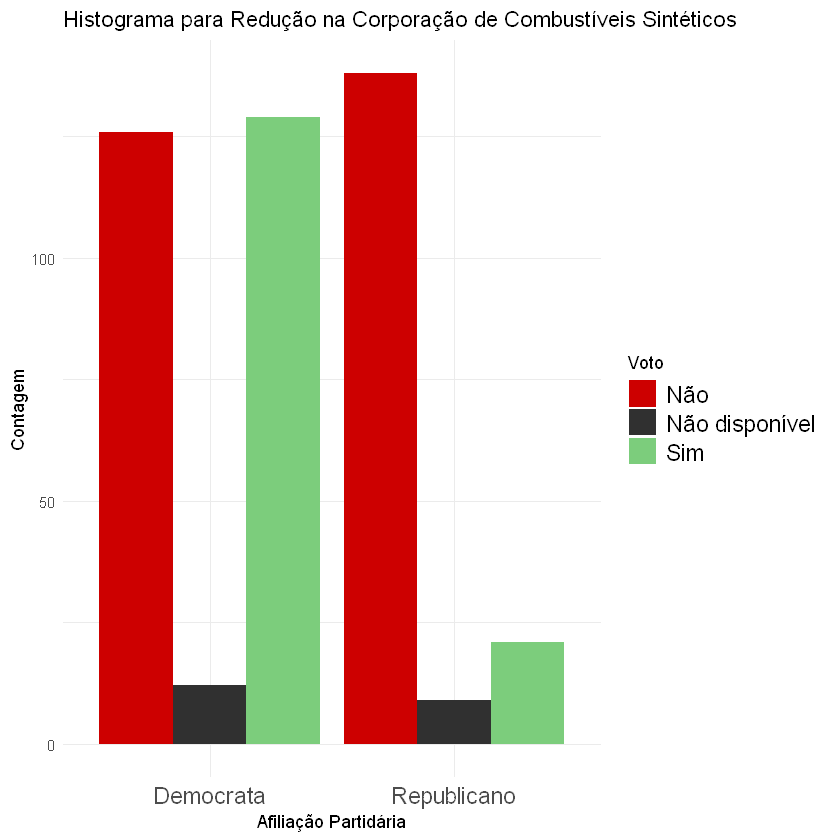

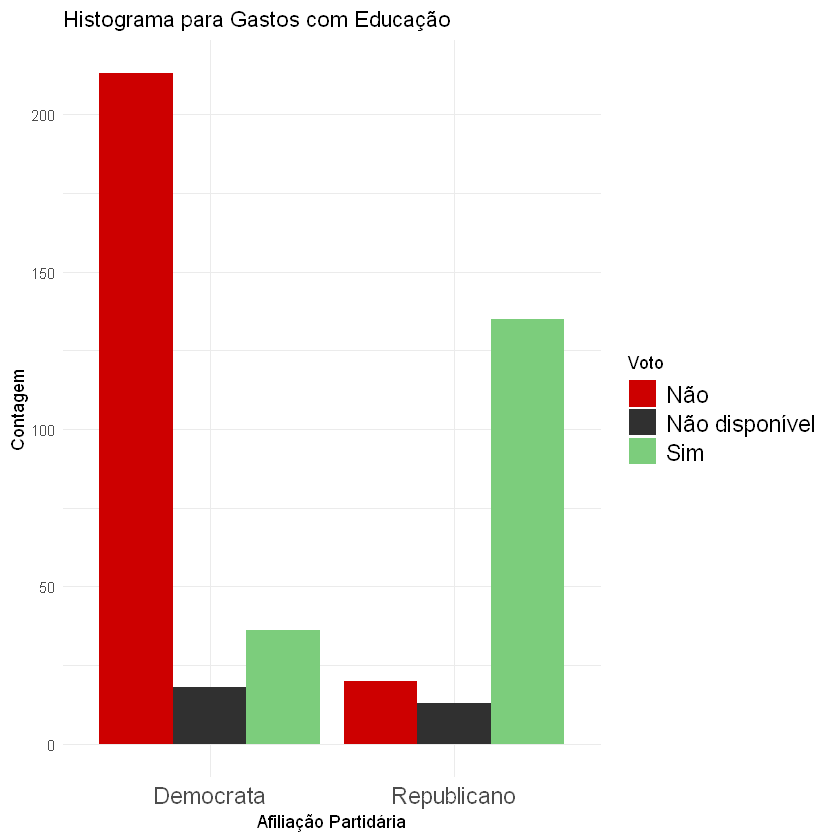

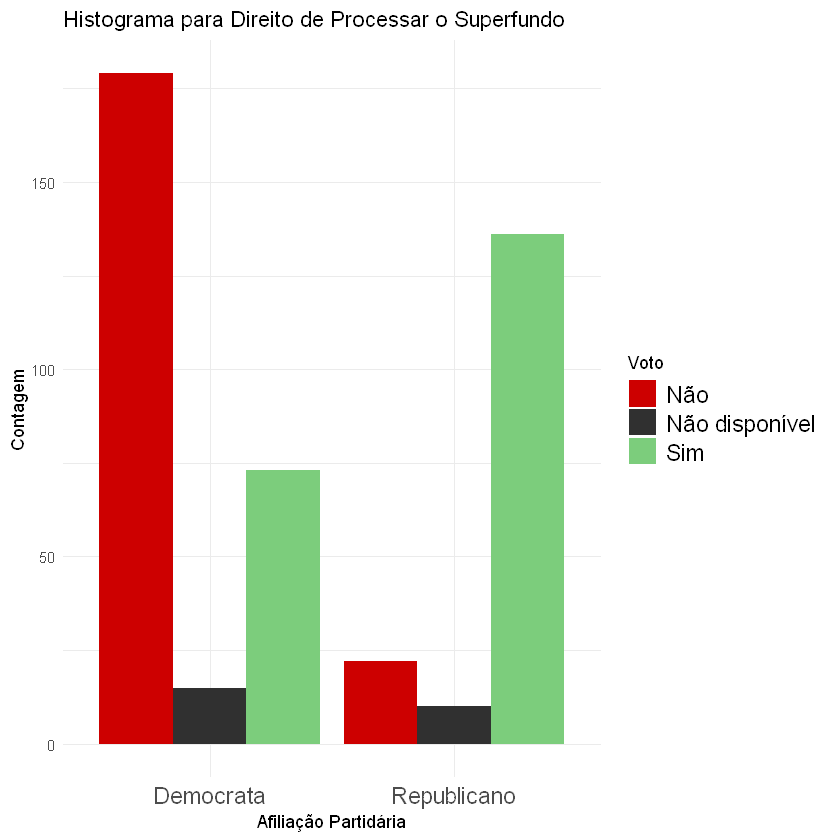

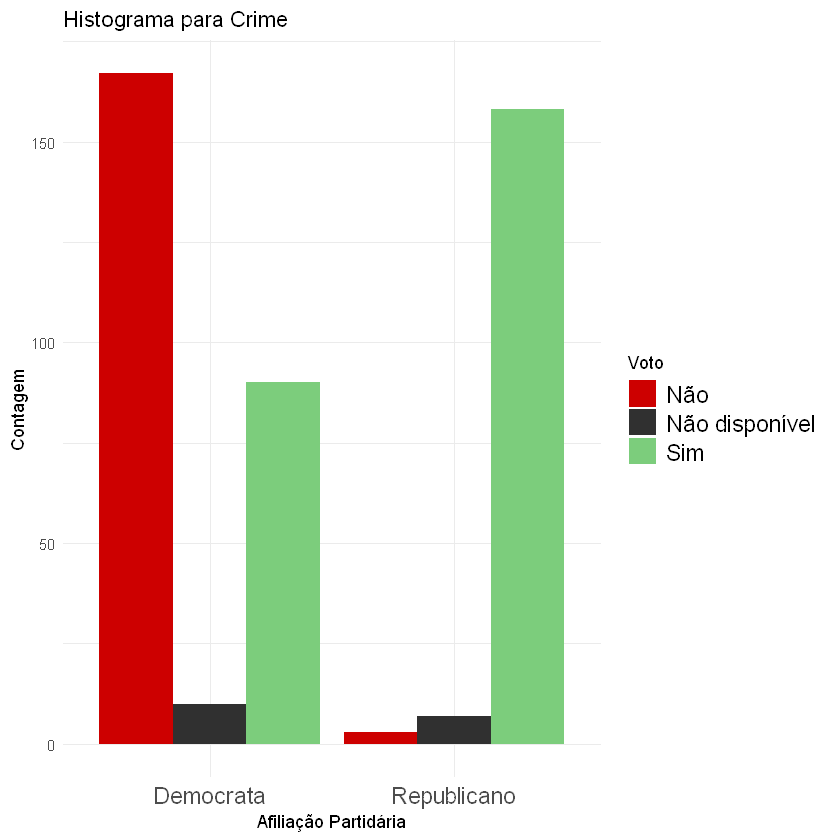

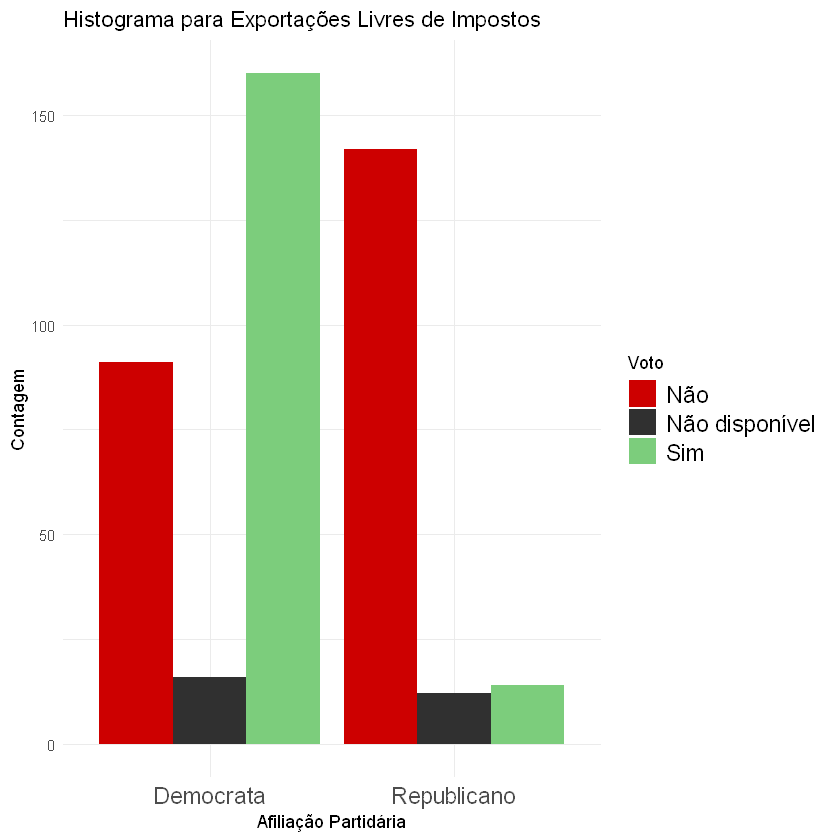

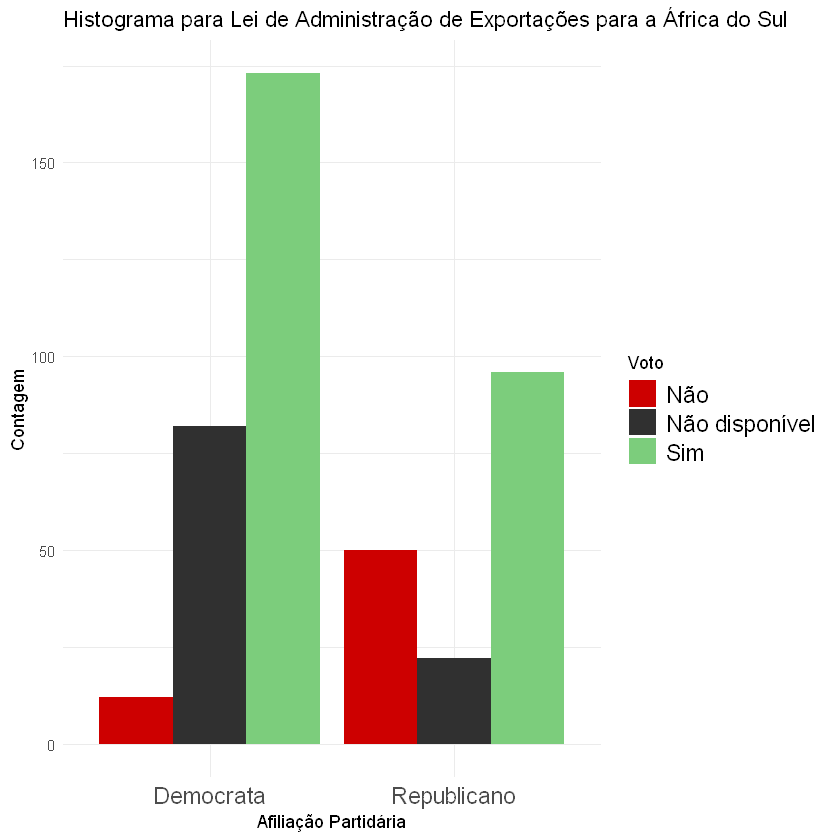

In [27]:
for (coluna in colnames(dados1)[2:17]) {
  print(
    ggplot(dados1, aes(x = Class, fill = dados1[[coluna]])) +  
      geom_bar(position = 'dodge', stat = 'count') +
      labs(title = sprintf('Histograma para %s', coluna),
           x = 'Afiliação Partidária',
           y = 'Contagem') +
      scale_x_discrete(labels = c('democrat' = 'Democrata', 'republican' = 'Republicano')) +
      scale_fill_manual(values = c('y' = 'palegreen3', 'n' = 'red3', 'NA' = 'gray19'), name = 'Voto',
                        labels = c('y' = 'Sim', 'n' = 'Não', 'NA' = 'Não disponível')) +
      theme_minimal() +
      theme(axis.text.x = element_text(size = 14),
            legend.text = element_text(size = 14))
  )
}

**position = 'dodge':** Isso define a posição das barras. A opção 'dodge' significa que as barras de diferentes categorias (no eixo x, que é Class neste caso) serão posicionadas lado a lado, não sobrepostas. Isso é útil quando você tem mais de uma categoria e deseja comparar as contagens entre elas.
**stat = 'count':** Isso especifica que o tipo de estatística usado para calcular a altura das barras é a contagem de observações em cada categoria. Em outras palavras, a altura das barras representará o número de vezes que cada categoria aparece nos dados.

In [28]:
#Cria-se um vetor com o nome das colunas
colnames(dados1)[2:17]
#for (coluna in ...): Isso inicia um loop for para realizar iteração por coluna

[1] "Bebês com Deficiência"                                   
 [2] "Compartilhamento de Custos do Projeto de Água"           
 [3] "Adoção da Resolução Orçamentária"                        
 [4] "Congelamento de Taxas Médicas"                           
 [5] "Ajuda a El Salvador"                                     
 [6] "Grupos Religiosos nas Escolas"                           
 [7] "Proibição de Testes Anti-Satélite"                       
 [8] "Ajuda aos Contras Nicaraguenses"                         
 [9] "Míssil MX"                                               
[10] "Imigração"                                               
[11] "Redução na Corporação de Combustíveis Sintéticos"        
[12] "Gastos com Educação"                                     
[13] "Direito de Processar o Superfundo"                       
[14] "Crime"                                                   
[15] "Exportações Livres de Impostos"                          
[16] "Lei de Administração de Exportações para a África do Sul"

In [29]:
#dados1[[coluna]] retorna o vetor específico associado à coluna chamada
dados1[['Bebês com Deficiência']]

[1] n  n  NA n  y  n  n  n  n  y  n  n  n  y  n  n  y  y  n  y  y  y  y  y  y 
 [26] y  y  y  y  y  n  y  y  n  y  n  y  y  n  y  y  y  y  y  y  y  y  y  y  n 
 [51] y  n  y  y  y  n  n  n  n  n  y  n  y  y  y  y  n  n  y  y  y  y  y  y  y 
 [76] n  n  n  y  n  y  y  n  n  n  n  n  n  n  n  y  y  y  y  y  y  n  y  y  n 
[101] y  y  y  y  NA y  n  n  y  y  n  n  n  n  y  n  y  y  n  n  n  n  n  y  n 
[126] n  n  n  n  NA y  n  n  n  n  n  n  n  n  y  n  n  n  NA n  n  n  n  n  n 
[151] y  y  n  n  n  y  y  n  n  n  n  n  n  n  y  n  y  y  n  y  y  n  n  n  y 
[176] n  n  n  NA y  NA n  y  NA n  y  n  y  y  y  n  n  n  n  n  n  n  n  n  y 
[201] n  y  y  y  n  n  n  y  n  y  n  n  n  n  y  n  y  n  y  n  n  n  y  n  n 
[226] n  n  y  n  n  n  n  n  n  n  n  n  y  y  n  n  y  n  n  y  y  n  n  NA y 
[251] n  n  y  n  y  y  n  n  n  y  y  y  y  y  y  y  n  y  y  y  y  n  y  n  y 
[276] n  n  n  n  n  n  y  y  n  n  n  n  y  y  y  y  y  y  y  n  n  n  y  n  n 
[301] n  n  n  n  n  n  n  y  n  y  n  n  y  n  n  n  n  y  n  y  n  y  y  y  n 
[326] n  y  n  y  y  n  y  y  n  n  n  n  y  y  y  n  n  n  n  n  n  n  y  y  n 
[351] n  n  n  n  n  y  n  n  y  n  y  y  y  y  y  n  y  y  n  n  y  y  n  n  n 
[376] n  y  n  n  n  y  y  y  y  y  y  n  y  n  y  NA y  y  NA y  y  y  y  n  n 
[401] n  n  NA n  y  n  y  n  y  n  n  y  n  y  y  n  y  y  y  y  y  n  n  n  n 
[426] n  y  n  NA y  n  n  n  n  n 
Levels: n NA y

### Modelos

In [30]:
#Removendo valores ausentes
dados2 <- na.omit(dados)

In [31]:
#Somando valores ausentes
sum(is.na(dados2))
dim(dados2)

[1] 0

[1] 232  17

In [32]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 4.2.3"


In [33]:
# Dividindo os dados em treino e teste com base na variável class
##80% dos dados salvo em amostra
amostra <- sample.split(dados2$Class, SplitRatio = 0.80)

In [34]:
treino <- subset(dados2, amostra ==TRUE)
dim(treino)

[1] 185  17

In [35]:
teste <- subset(dados2, amostra ==FALSE)
dim(teste)

[1] 47 17

In [36]:
# Invocando o método NaiveBayes
library(e1071)

Warning message:
"package 'e1071' was built under R version 4.2.3"


In [37]:
# Treine o modelo
nb_model <- naiveBayes(Class ~ ., data = treino)
summary(nb_model)

          Length Class  Mode     
apriori    2     table  numeric  
tables    16     -none- list     
levels     2     -none- character
isnumeric 16     -none- logical  
call       4     -none- call     

In [38]:
nb_model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  democrat republican 
 0.5351351  0.4648649 

Conditional probabilities:
            V1
Y                    n         y
  democrat   0.4242424 0.5757576
  republican 0.7790698 0.2209302

            V2
Y                    n         y
  democrat   0.5454545 0.4545455
  republican 0.5232558 0.4767442

            V3
Y                    n         y
  democrat   0.1515152 0.8484848
  republican 0.8604651 0.1395349

            V4
Y                     n          y
  democrat   0.95959596 0.04040404
  republican 0.01162791 0.98837209

            V5
Y                     n          y
  democrat   0.81818182 0.18181818
  republican 0.04651163 0.95348837

            V6
Y                    n         y
  democrat   0.5959596 0.4040404
  republican 0.1279070 0.8720930

            V7
Y                    n         y
  democrat   0.2121212 0.7878788
  republi

In [39]:
# Faça as Previsões
previsao <- predict(nb_model, teste[,-1])

In [40]:
# Crie a Confusion matrix
table(pred = previsao, true = teste$Class)

            true
pred         democrat republican
  democrat         21          1
  republican        4         21

In [41]:
# Média
mean(previsao == teste$Class)

[1] 0.893617